In [1]:
# Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Assign colum names to the dataset
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Load data
data = pd.read_csv("./data/car.data", names=names)

In [3]:
# Print first five rows
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Split to response variables and target variable
X = data.drop("class", axis=1)
y = data["class"]

In [5]:
# Print number of instances and features
print("Number of instances: %d" % X.shape[0])
print("Number of features: %d" % X.shape[1])

# Count class labels
unique, counts = np.unique(y, return_counts=True)
print("Number of class labels:")
print(dict(zip(unique, counts)))

Number of instances: 1728
Number of features: 6
Number of class labels:
{'acc': 384, 'good': 69, 'unacc': 1210, 'vgood': 65}


In [6]:
# Encode categorical variables
X.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
X.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
X.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
X.persons.replace(('2','4','more'),(1,2,3), inplace=True)
X.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
X.safety.replace(('low','med','high'),(1,2,3), inplace=True)

In [7]:
X = np.array(X, dtype="int")
y = np.array(y)

In [8]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# k Nearest Neighbor
from kNN import KNNClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "metric": ["euclidean", "manhattan", "chebyshev"]}
]

classifier = KNNClassifier()
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("All results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, ":", mean_score)

kNN_model = grid_search.best_estimator_

Best parameters:  {'k': 7, 'metric': 'manhattan'}
All results:
{'k': 1, 'metric': 'euclidean'} : 0.849493487698987
{'k': 1, 'metric': 'manhattan'} : 0.8437047756874095
{'k': 1, 'metric': 'chebyshev'} : 0.6251808972503617
{'k': 2, 'metric': 'euclidean'} : 0.849493487698987
{'k': 2, 'metric': 'manhattan'} : 0.8437047756874095
{'k': 2, 'metric': 'chebyshev'} : 0.6251808972503617
{'k': 3, 'metric': 'euclidean'} : 0.9196816208393632
{'k': 3, 'metric': 'manhattan'} : 0.9182344428364689
{'k': 3, 'metric': 'chebyshev'} : 0.7120115774240231
{'k': 4, 'metric': 'euclidean'} : 0.9232995658465991
{'k': 4, 'metric': 'manhattan'} : 0.9290882778581766
{'k': 4, 'metric': 'chebyshev'} : 0.7134587554269175
{'k': 5, 'metric': 'euclidean'} : 0.9421128798842258
{'k': 5, 'metric': 'manhattan'} : 0.9399421128798843
{'k': 5, 'metric': 'chebyshev'} : 0.7424023154848046
{'k': 6, 'metric': 'euclidean'} : 0.9356005788712012
{'k': 6, 'metric': 'manhattan'} : 0.9392185238784371
{'k': 6, 'metric': 'chebyshev'} : 0.75

In [10]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb_model = classifier

In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 100}
0.7054992764109985 {'max_depth': 1}
0.85383502170767 {'max_depth': 5}
0.967438494934877 {'max_depth': 10}
0.9703328509406657 {'max_depth': 50}
0.9710564399421129 {'max_depth': 100}


============================== kNN ==============================
Classfication report
              precision    recall  f1-score   support

         acc       0.92      0.84      0.88        83
        good       0.80      0.73      0.76        11
       unacc       0.95      1.00      0.97       235
       vgood       0.92      0.71      0.80        17

   micro avg       0.94      0.94      0.94       346
   macro avg       0.90      0.82      0.85       346
weighted avg       0.94      0.94      0.93       346

Confusion matrix


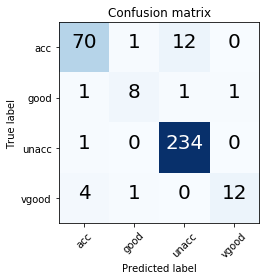

============================== Naive Bayes ==============================
Classfication report
              precision    recall  f1-score   support

         acc       0.61      0.20      0.31        83
        good       0.40      0.18      0.25        11
       unacc       0.84      0.85      0.85       235
       vgood       0.22      1.00      0.37        17

   micro avg       0.68      0.68      0.68       346
   macro avg       0.52      0.56      0.44       346
weighted avg       0.74      0.68      0.67       346

Confusion matrix


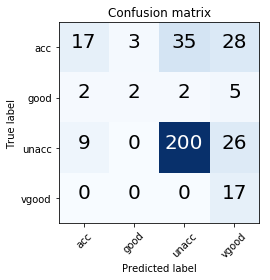

============================== Decision Tree ==============================
Classfication report
              precision    recall  f1-score   support

         acc       0.97      0.89      0.93        83
        good       0.62      0.91      0.74        11
       unacc       0.99      1.00      0.99       235
       vgood       1.00      0.94      0.97        17

   micro avg       0.97      0.97      0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.97      0.97      0.97       346

Confusion matrix


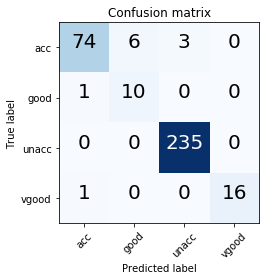

In [12]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=20)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
class_names = np.unique(y_test)

models = {'kNN': kNN_model, 'Naive Bayes': nb_model, 'Decision Tree': tree_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation results
    print(f"============================== {name} ==============================")
    
    # Print classification report
    print("Classfication report")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Compute confusion matrix
    print("Confusion matrix")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
    plt.show()